<a href="https://colab.research.google.com/github/mchardians/PCVK_Matrikulasi_2024/blob/main/Praktikum_1_Modul_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans

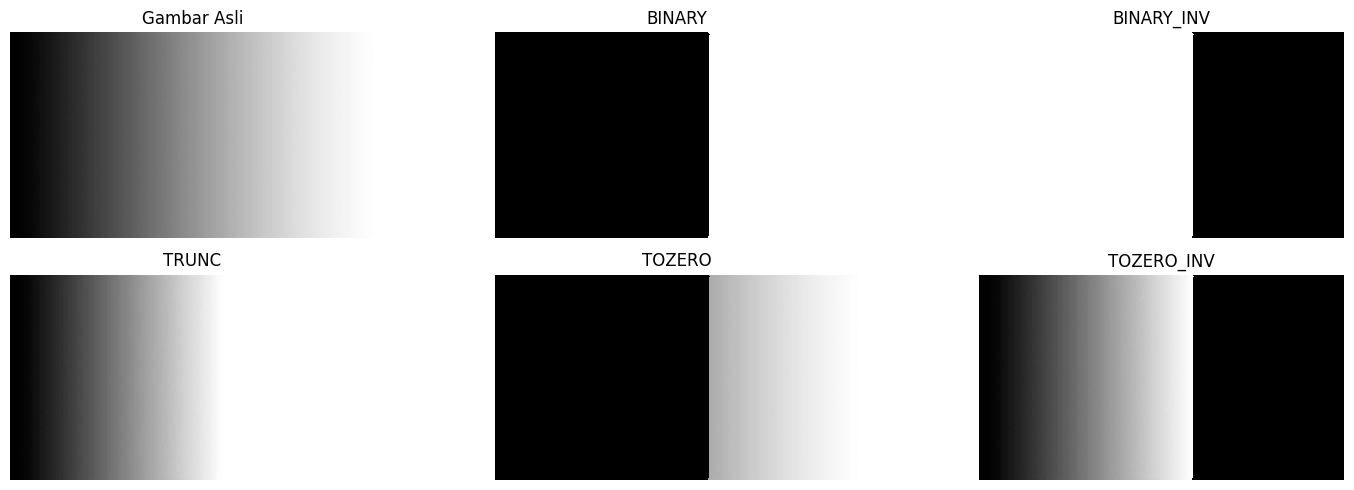

In [23]:
gradient = Image.open('Images/gradient.jpg').convert("L")

thresh = 170

def thresholding(image, threshold):
    img_array = np.array(image)

    threshold_methods = {
        'BINARY': np.where(img_array > threshold, 255, 0),
        'BINARY_INV': np.where(img_array > threshold, 0, 255),
        'TRUNC': np.where(img_array > threshold, threshold, img_array),
        'TOZERO': np.where(img_array > threshold, img_array, 0),
        'TOZERO_INV': np.where(img_array > threshold, 0, img_array)
    }

    thresholded_images = {key: Image.fromarray(value.astype(np.uint8)) for key, value in threshold_methods.items()}

    return thresholded_images

thresholded_images = thresholding(gradient, thresh)

titles = ['Gambar Asli'] + list(thresholded_images.keys())
images = [gradient] + list(thresholded_images.values())

plt.figure(figsize=(15, 5))
for i, (title, img) in enumerate(zip(titles, images)):
    plt.subplot(2, 3, i + 1)
    plt.imshow(img, cmap='gray', interpolation='nearest')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

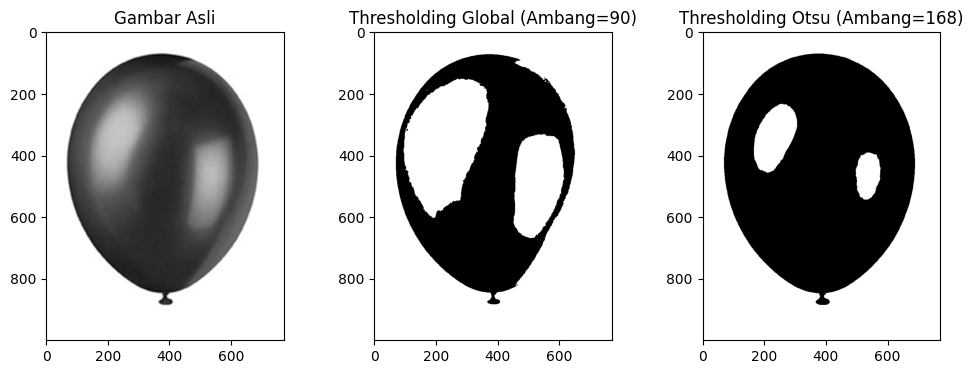

In [26]:
balloons = cv.imread('Images/balloons.jpg', cv.IMREAD_GRAYSCALE)

histogram = cv.calcHist([balloons], [0], None, [256], [0, 256]).flatten()

def otsu_threshold(histogram):
    total_pixels = np.sum(histogram)
    current_max = 0
    threshold = 0

    background_sum = 0
    foreground_sum = np.sum(histogram * np.arange(len(histogram)))

    background_weight = 0
    foreground_weight = total_pixels

    for t in range(len(histogram)):
        background_weight += histogram[t]
        foreground_weight -= histogram[t]

        if background_weight == 0 or foreground_weight == 0:
            continue

        background_sum += t * histogram[t]
        foreground_sum -= t * histogram[t]

        mean_background = background_sum / background_weight
        mean_foreground = foreground_sum / foreground_weight

        variance_between_classes = background_weight * foreground_weight * (mean_background - mean_foreground) ** 2

        if variance_between_classes > current_max:
            current_max = variance_between_classes
            threshold = t

    return threshold

otsu_thresh = otsu_threshold(histogram)

global_thresh = 90

otsu_result = (balloons > otsu_thresh).astype(np.uint8) * 255
global_result = (balloons > global_thresh).astype(np.uint8) * 255

plt.figure(figsize=(12, 4))
plt.subplot(131), plt.imshow(balloons, cmap='gray'), plt.title('Gambar Asli')
plt.subplot(132), plt.imshow(global_result, cmap='gray'), plt.title(f'Thresholding Global (Ambang={global_thresh})')
plt.subplot(133), plt.imshow(otsu_result, cmap='gray'), plt.title(f'Thresholding Otsu (Ambang={otsu_thresh})')
plt.show()

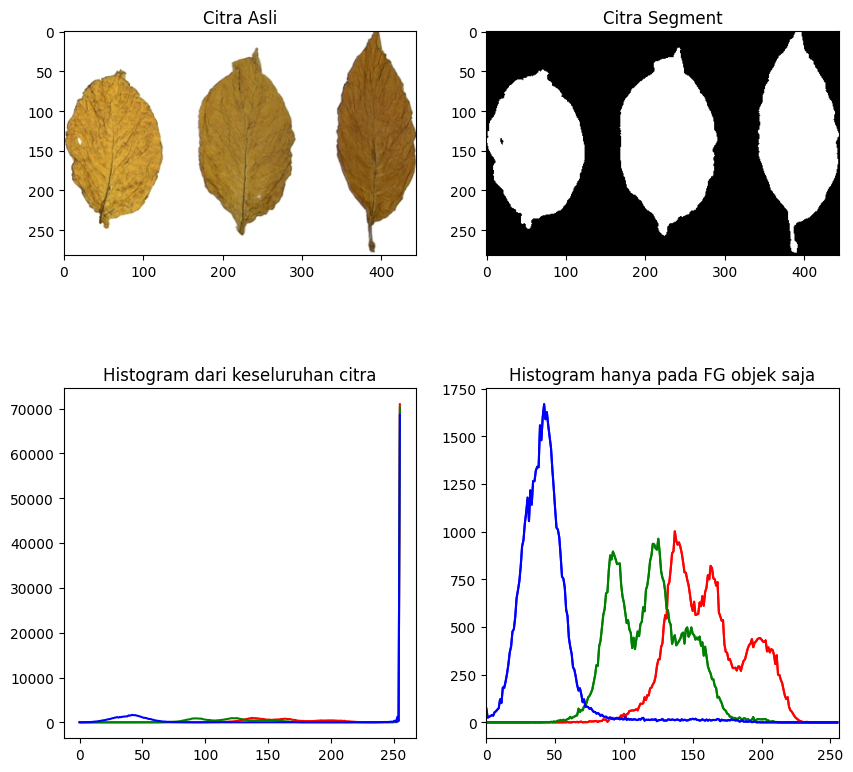

In [22]:
tobacco = cv.imread('Images/tobacco.jpg')
tobacco_rgb = cv.cvtColor(tobacco,cv.COLOR_BGR2RGB)
tobacco_gray = cv.cvtColor(tobacco_rgb,cv.COLOR_BGR2GRAY)

ret3,mask = cv.threshold(tobacco_gray,200,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(tobacco_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv.calcHist([tobacco_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([tobacco_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([tobacco_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram Hanya Pada FG Objek Saja')
    plt.xlim([0,256])

plt.show()

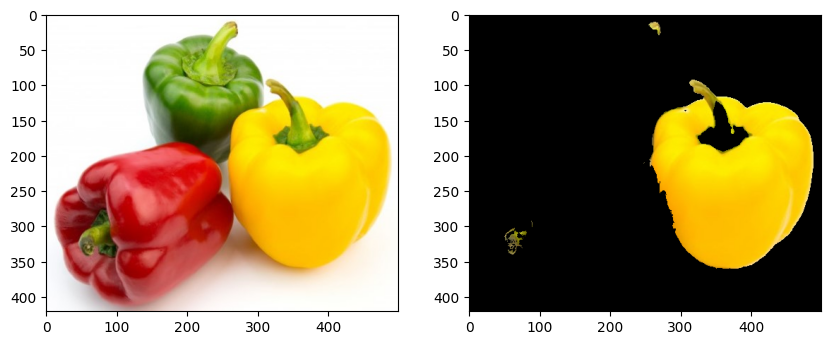

In [18]:
peppers = cv.imread('Images/peppers.jpg')
peppers_rgb = cv.cvtColor(peppers, cv.COLOR_BGR2RGB)

hsv_image = cv.cvtColor(peppers_rgb, cv.COLOR_RGB2HSV)

lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])

yellow_mask = cv.inRange(hsv_image, lower_yellow, upper_yellow)

yellow_segmented_hsv = cv.bitwise_and(peppers_rgb, peppers_rgb, mask=yellow_mask)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(peppers_rgb)

plt.subplot(1, 2, 2)
plt.imshow(yellow_segmented_hsv)

plt.show()